# Churn Analysis

**Dataset Info:**
Sample Data Set containing customer data and showing customers who have left last month

In [ ]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
telco_base_data = pd.read_csv('Churn_Modelling_EDA (1).csv')

Look at the top 5 records of data

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

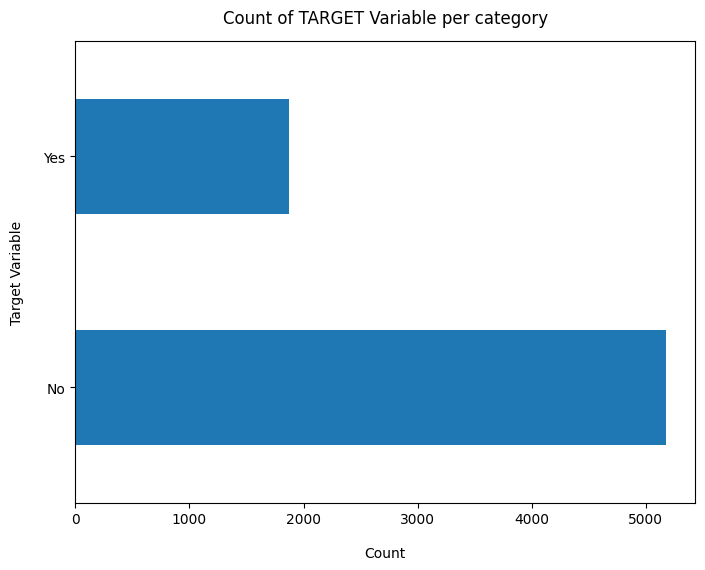

In [8]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [10]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [11]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [12]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [13]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

In [14]:
null_percentage = telco_data['TotalCharges'].isnull().mean() * 100
print(null_percentage)

0.1561834445548772


Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [15]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)


**5.** Divide customers into groups based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24;

In [16]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [17]:
# Group the tenure in groups of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [18]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**6.** Remove columns not required for processing

In [19]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
1.  Plot distibution of individual predictors by churn

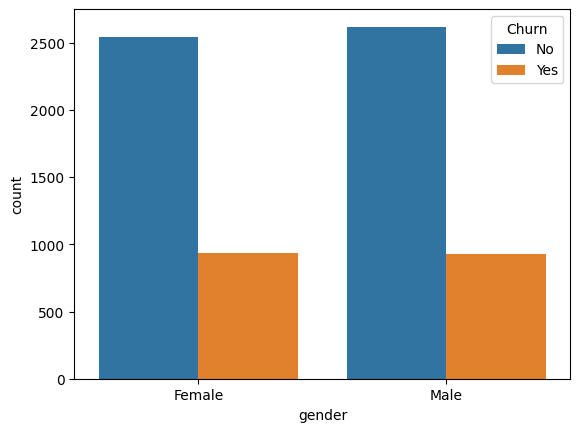

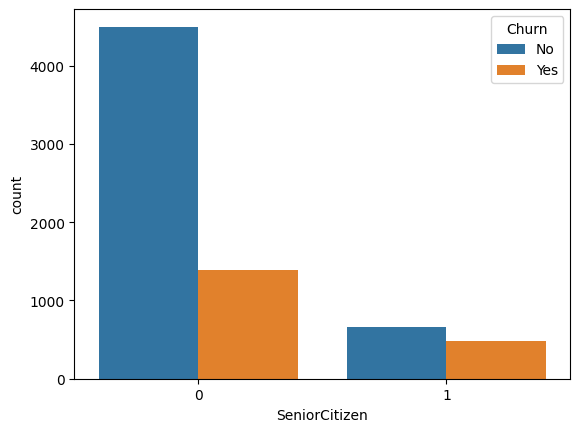

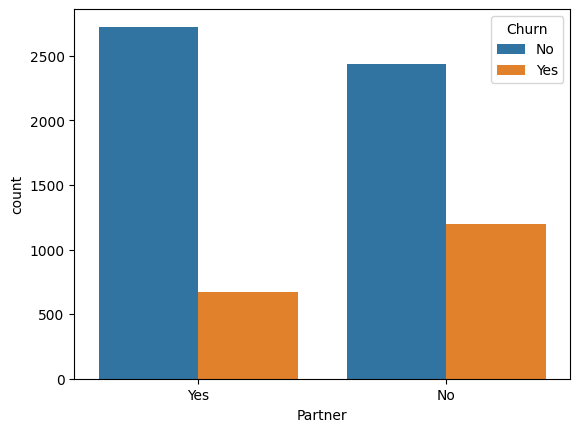

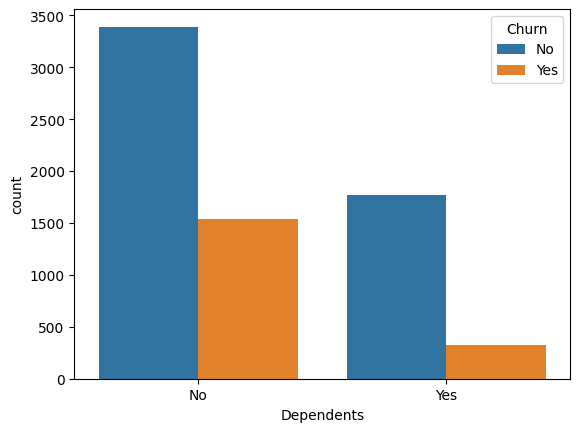

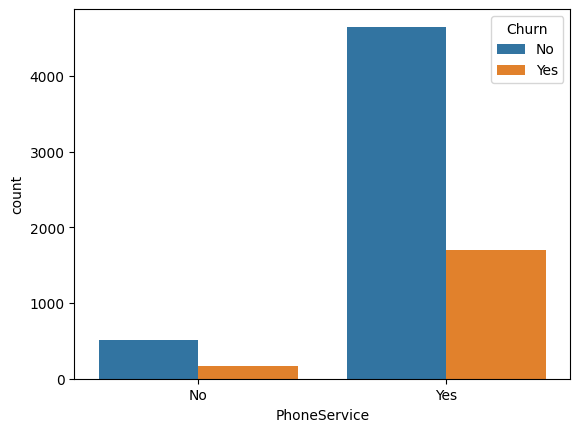

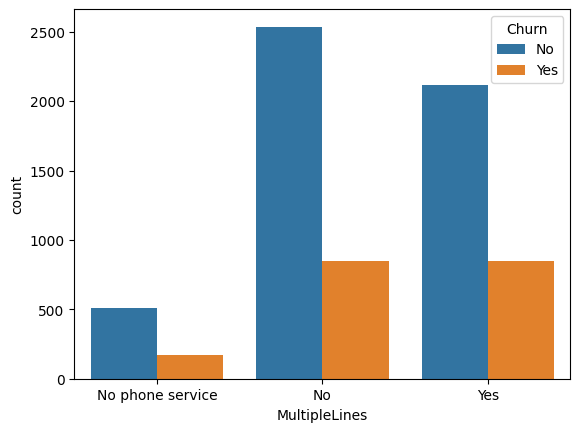

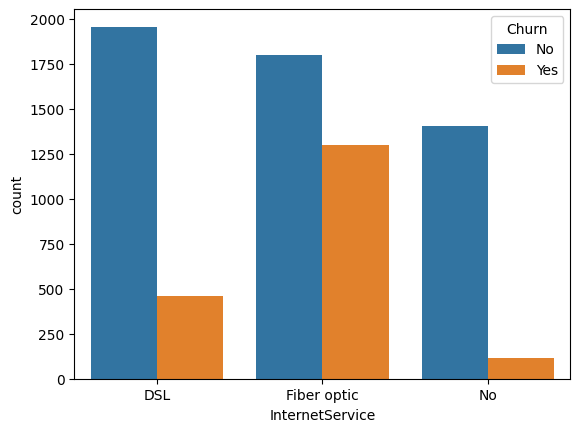

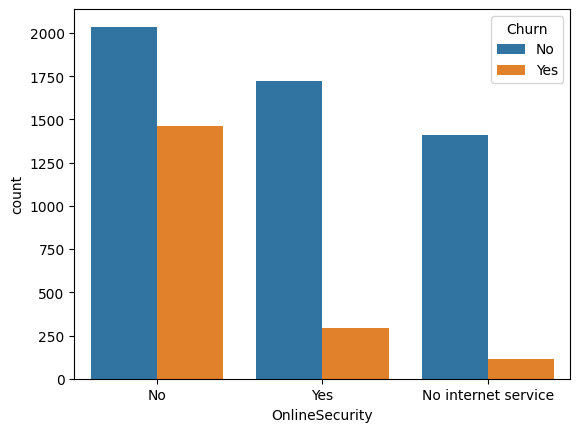

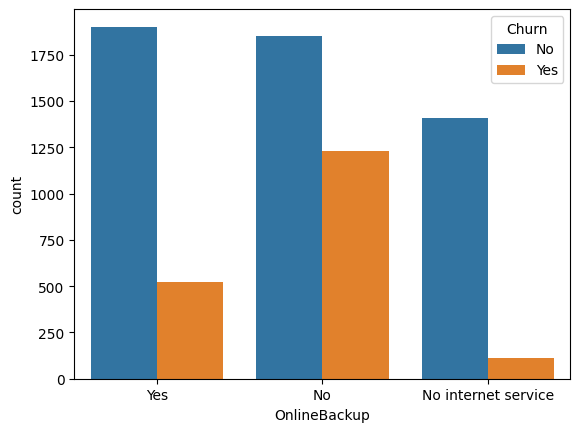

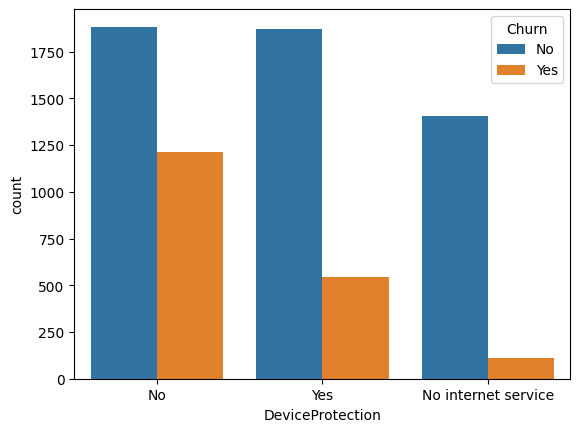

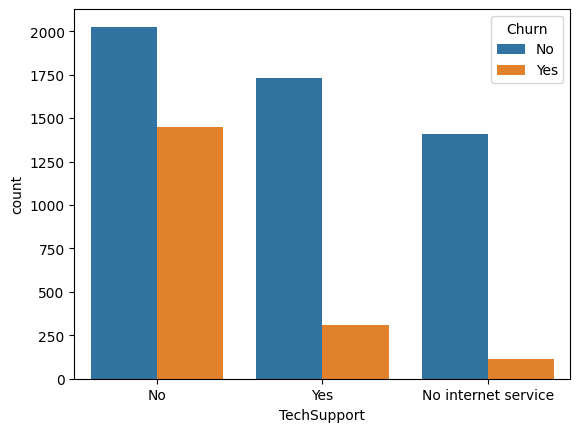

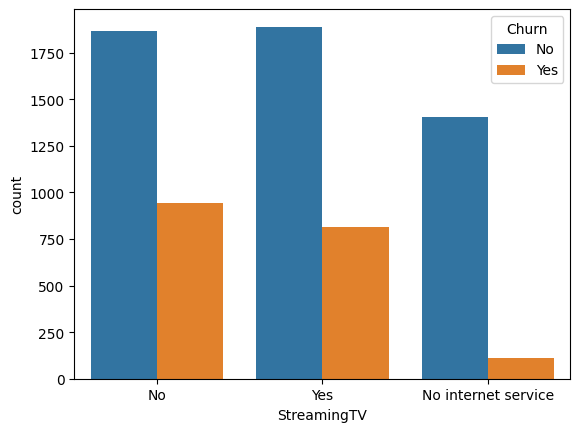

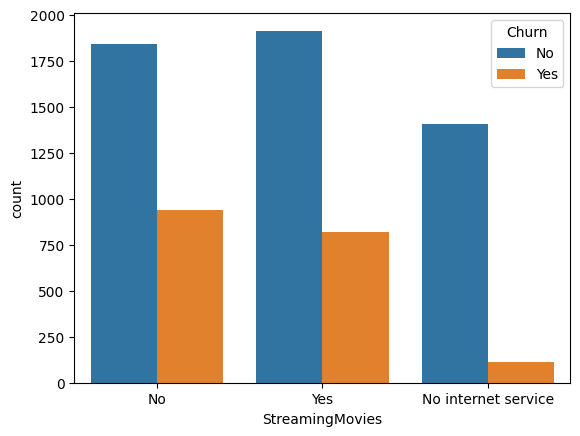

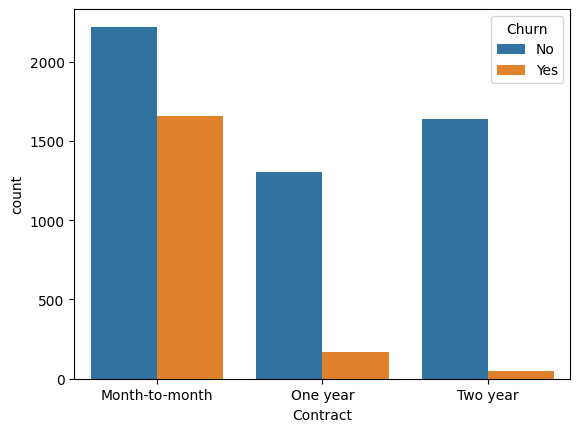

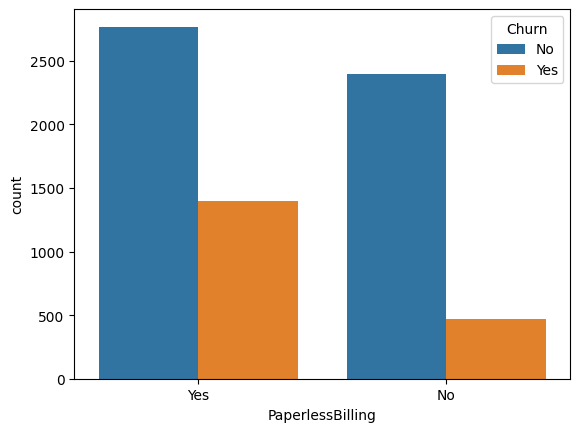

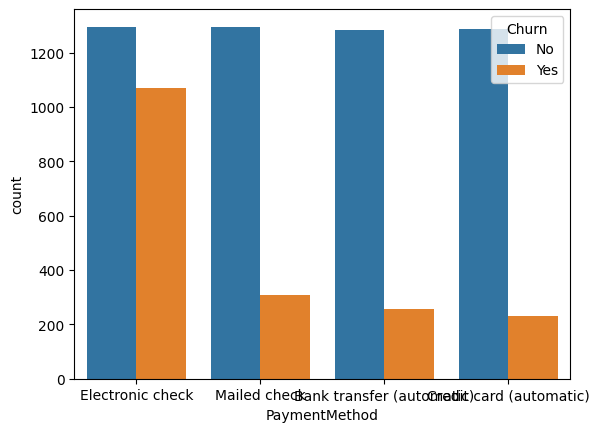

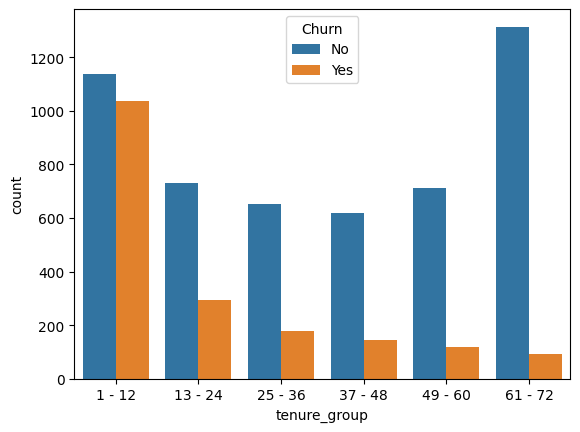

In [20]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [21]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [22]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**10. ** Churn by Monthly Charges and Total Charges

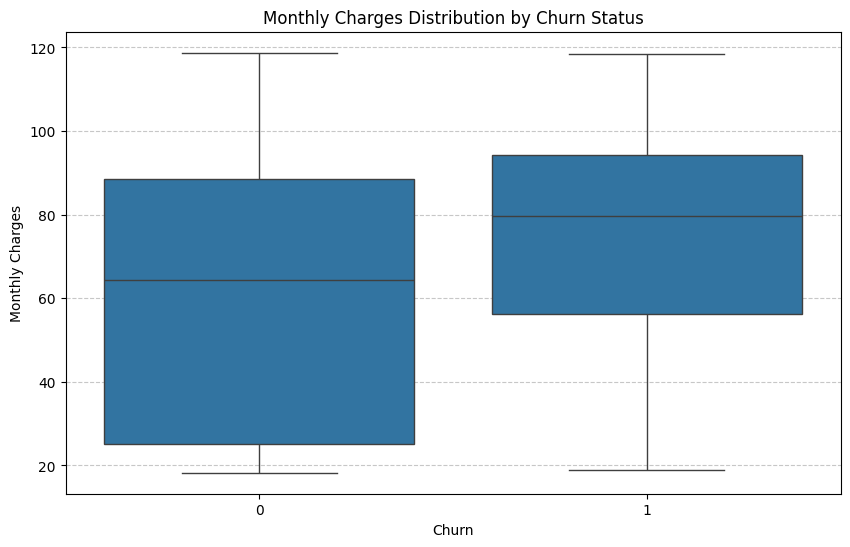

In [23]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=telco_data, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Insight: Churn is high when Monthly Charges are high

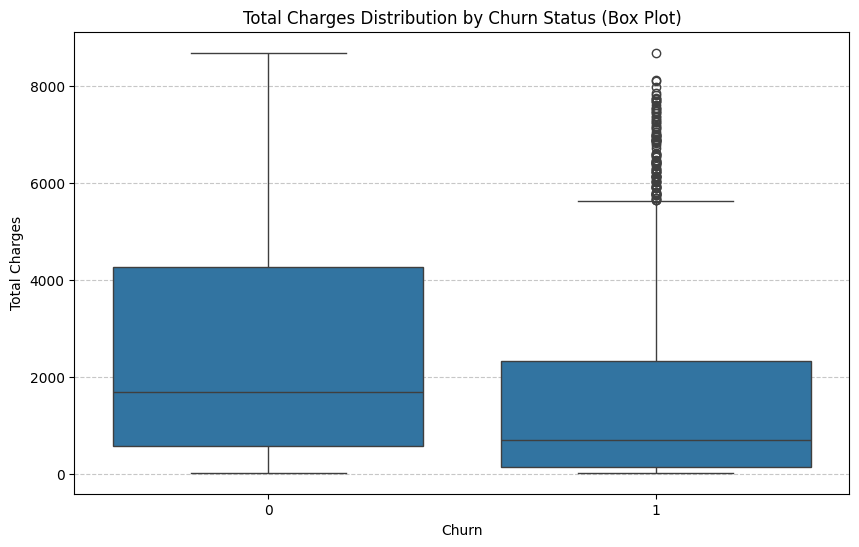

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=telco_data, x='Churn', y='TotalCharges')
plt.title("Total Charges Distribution by Churn Status (Box Plot)")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge.

**11. Build a corelation of all predictors with 'Churn' **

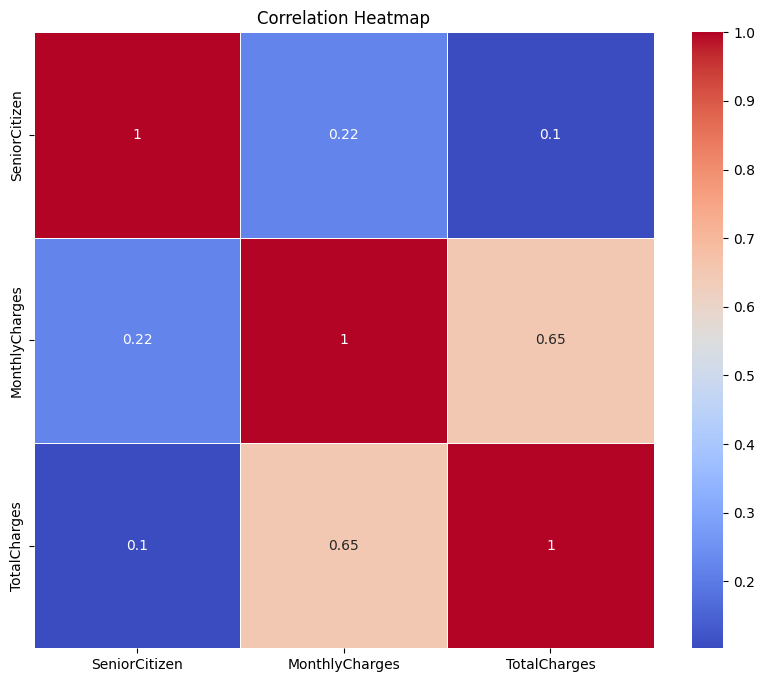

In [25]:

 numeric_df = telco_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Display the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [26]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Here are some of the insights from our analysis:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners


In [27]:
# separating data and Labels
xt = telco_data.drop(columns=['Churn'],axis=1)  # Replace 'Churn' with the actual target column name
yt = telco_data['Churn']

Training and Test data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(xt,yt, test_size = 0.2, stratify=yt, random_state=2)

In [29]:
print(xt.shape, X_train.shape, X_test.shape)

(7032, 19) (5625, 19) (1407, 19)


Model Training --> Logistic Regression

In [30]:
telco_data = pd.get_dummies(telco_data, drop_first=False)

## Advanced Insights and Feature Interactions

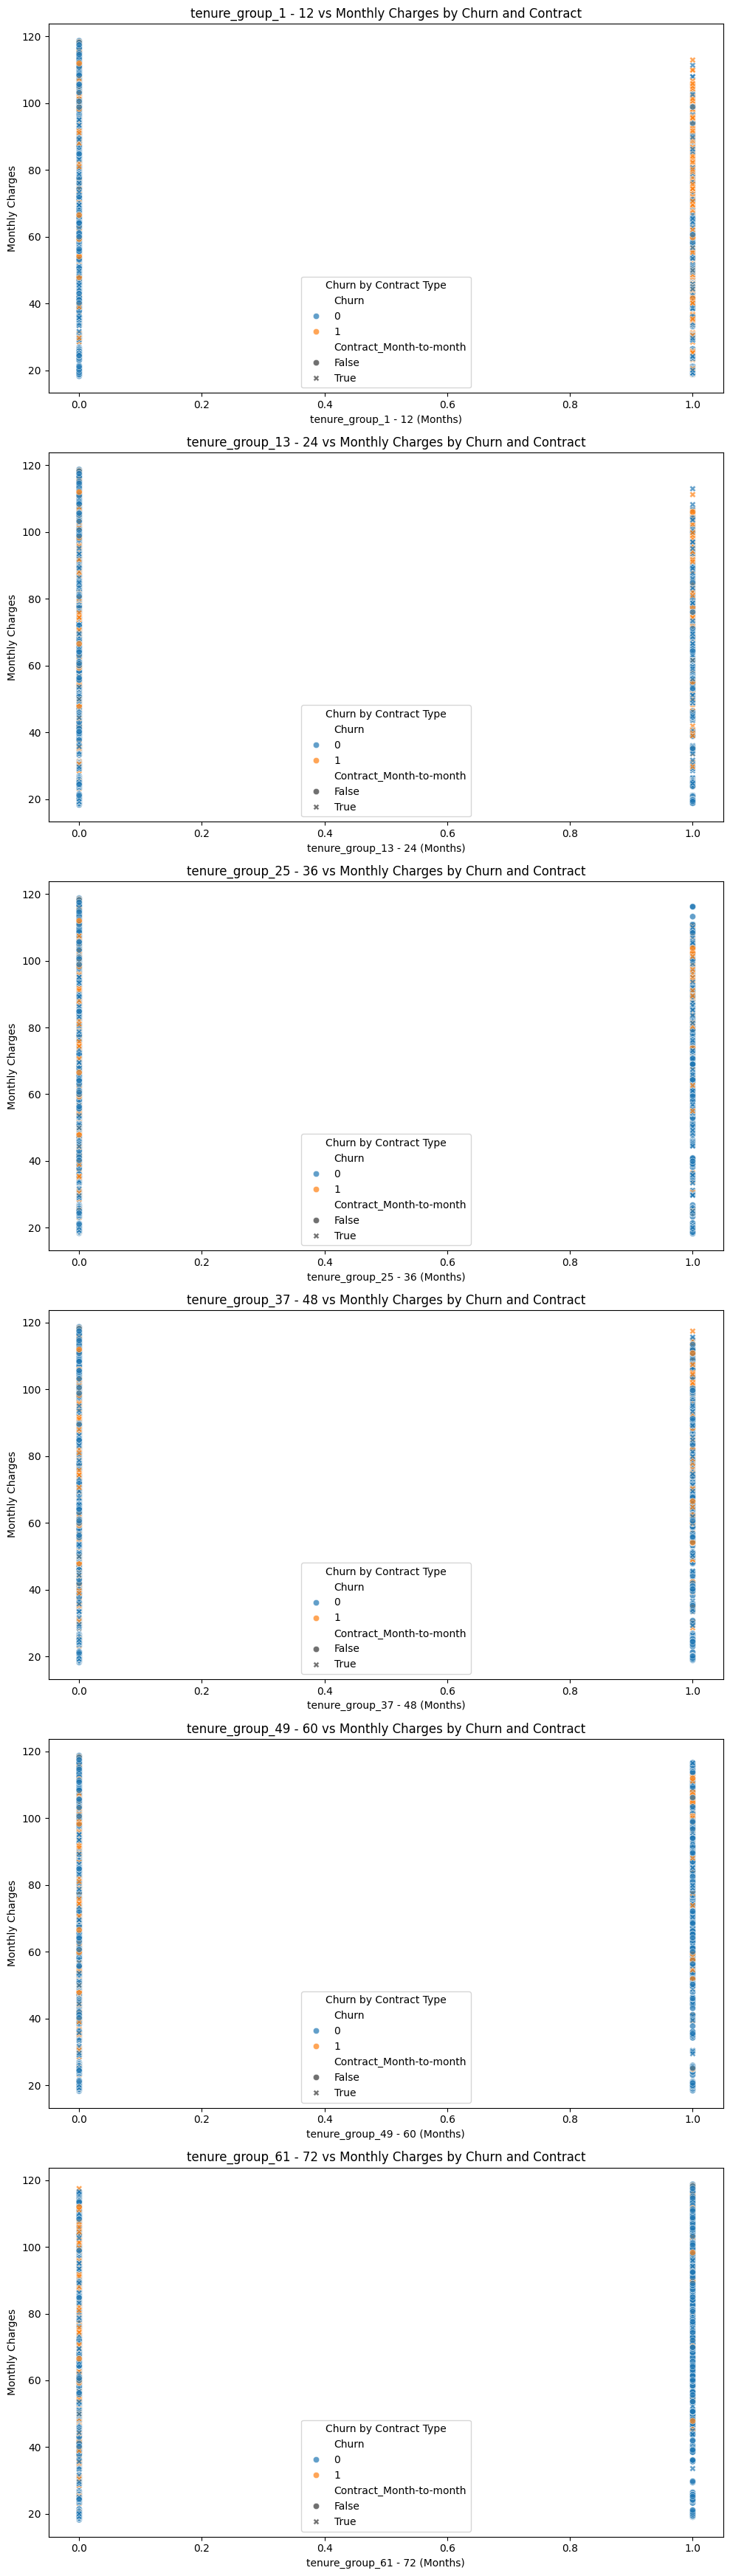

In [60]:
# Define your tenure groups
tenure_groups = [
    'tenure_group_1 - 12', 
    'tenure_group_13 - 24', 
    'tenure_group_25 - 36',
    'tenure_group_37 - 48', 
    'tenure_group_49 - 60', 
    'tenure_group_61 - 72'
]

# Create a larger figure with 6 subplots (one for each tenure group)
plt.figure(figsize=(10, 35))

# Loop through each tenure group and plot the corresponding data
for i, tenure_group in enumerate(tenure_groups, 1):
    plt.subplot(6, 1, i)  # 6 rows, 1 column, and current subplot index
    # Ensure that you're plotting the correct tenure group (e.g., 'tenure_group_1 - 12')
    sns.scatterplot(data=telco_data, x=tenure_group, y='MonthlyCharges', hue='Churn', style='Contract_Month-to-month', alpha=0.7)
    
    # Title and labels for each subplot
    plt.title(f'{tenure_group} vs Monthly Charges by Churn and Contract')
    plt.xlabel(f'{tenure_group} (Months)')
    plt.ylabel('Monthly Charges')
    
    # Adjust the legend and make sure it appears correctly
    plt.legend(title='Churn by Contract Type')

# Adjust layout to prevent overlapping subplots
plt.tight_layout()

# Display the plot
plt.show()


Insights:
1. Customers with higher monthly charges tend to show lower churn rates, particularly in the longer tenure groups. This suggests that customers who have been with the company for a longer time and are paying more are likely more loyal.
2. Customers on month-to-month contracts tend to have higher churn rates across most tenure groups. These customers are more likely to leave due to the flexibility of the contract.
3. Customers in shorter tenure groups (e.g., tenure_group_1 - 12) tend to have lower monthly charges, likely due to introductory pricing or promotions.
4. Customers in longer tenure groups (e.g., tenure_group_37 - 48) generally have higher monthly charges, indicating they might be on premium plans or have had multiple plan upgrades.
5. Customers with lower monthly charges (especially in the shorter tenure groups) are more likely to churn. This could be because they are on basic plans, which are easier to switch away from, or they may find better value elsewhere.
6. Customers in higher tenure groups with high monthly charges represent high-value segments that should be prioritized for retention. They likely represent long-term investments and are more likely to stay loyal.

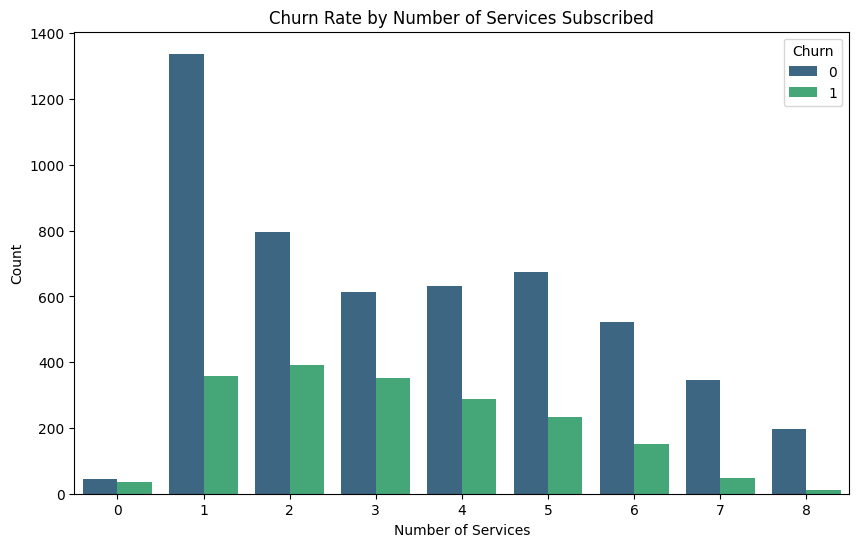

In [63]:
# Define the columns for services that are marked with 'Yes'
service_columns = ['PhoneService_Yes', 'MultipleLines_Yes', 'OnlineSecurity_Yes', 
                   'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 
                   'StreamingTV_Yes', 'StreamingMovies_Yes']

# Create the 'NumServices' column based on how many 'Yes' values each customer has
telco_data['NumServices'] = telco_data[service_columns].apply(lambda x: (x == 1).sum(), axis=1)

# Plot the churn rate by the number of services subscribed
plt.figure(figsize=(10, 6))
sns.countplot(data=telco_data, x='NumServices', hue='Churn', palette='viridis')
plt.title('Churn Rate by Number of Services Subscribed')
plt.xlabel('Number of Services')
plt.ylabel('Count')
plt.show()


Insights:
1. Fewer services = Higher churn: Customers with fewer services are more likely to leave.
2. More services = Lower churn: Customers with more services tend to stay.
3. Focus on increasing the number of services per customer: Target customers with 0-2 services for upselling and retention strategies.
4. Bundling services can reduce churn: Offering bundled packages may help retain customers.